In [1]:
import PIL.Image
import numpy as np
import math
from scipy import signal
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt

Part 2: Gaussian Filtering

2-1

In [2]:
def boxfilter(n):
  """Returns a box filter of size n by n, where n is odd."""
  try:
    assert n % 2 == 1
    cell_count = n * n
    filter = np.ones((n,n)) / cell_count
    return filter
  except AssertionError:
    print("Dimension must be odd")

In [3]:
print(f"n = 3 \n {boxfilter(3)}")

n = 3 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [4]:
print(f"n = 4 \n {boxfilter(4)}")

Dimension must be odd
n = 4 
 None


In [5]:
print(f"n = 5 \n {boxfilter(5)}")

n = 5 
 [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


2-2

In [6]:
def gauss1d(sigma):
  """Returns a 1D array, which is a 1D Gaussian filter for a given value of sigma."""

  # Define the length of this 1D array
  length = np.ceil(6 * sigma)
  if length % 2 == 0:
    length += 1

  # Create a zero-centered 1D filter with the length
  filter = np.arange(-(length // 2), length // 2 + 1)

  # Pass it through the density function
  filter = np.exp(-filter**2 / (2*sigma**2))

  # Normalize
  filter = filter / np.sum(filter)
  return filter

print(f"sigma = 0.3 \n {gauss1d(0.3)}")
print(f"sigma = 0.5 \n {gauss1d(0.5)}")
print(f"sigma = 1 \n {gauss1d(1)}")
print(f"sigma = 2 \n {gauss1d(2)}")

sigma = 0.3 
 [0.00383626 0.99232748 0.00383626]
sigma = 0.5 
 [0.10650698 0.78698604 0.10650698]
sigma = 1 
 [0.00443305 0.05400558 0.24203623 0.39905028 0.24203623 0.05400558
 0.00443305]
sigma = 2 
 [0.0022182  0.00877313 0.02702316 0.06482519 0.12110939 0.17621312
 0.19967563 0.17621312 0.12110939 0.06482519 0.02702316 0.00877313
 0.0022182 ]


2-3

In [7]:
def gauss2d(sigma):
  """Returns a 2D array, which is a 2D Gaussian filter for a given value of sigma."""

  # Define a 1D filter and convert it to 2D array
  filter1d = gauss1d(sigma)[np.newaxis]

  # A 2D Gaussian can be formed by convolution of a 1D Gaussian with its transpose
  filter2d = signal.convolve2d(filter1d, np.transpose(filter1d))

  # Normalize
  filter2d = filter2d / np.sum(filter2d)

  return filter2d

print(f"sigma = 0.5 \n {gauss2d(0.5)}")
print(f"sigma = 1 \n {gauss2d(1)}")

sigma = 0.5 
 [[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]
sigma = 1 
 [[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]]


2-4 (a)

In [8]:
def convolve2d_manual(array, filter):
  """Performs convolution to the image with zero paddings.

  Args:
    array: an image with input variables in `np.float32` type
    filter: a filter with input variables in `np.float32` type

  Returns:
    None

  """

  # Get the dimensions of an input image and filter
  rows_img, cols_img = np.shape(array)
  rows_filter, cols_filter = np.shape(filter)

  # Number of zero paddings on each side
  row_padding = rows_filter // 2
  col_padding = cols_filter // 2

  # Zero pad the image
  padded_arr = np.pad(array, ((row_padding, row_padding), (col_padding, col_padding)))

  convolved = np.zeros((rows_img, cols_img))
  # Convolve
  for i in range(rows_img):
    for j in range(cols_img):
      convolved[i,j] = np.sum(np.multiply(filter, padded_arr[i:i + rows_filter, j:j+cols_filter]))

  return convolved


2-4 (b)

In [9]:
def gaussconvolve2d_manual(array,sigma):
  """Applies Gaussian convolution to a 2D array for the given value of sigma.

  Returns:
    2D array

  """

  # Create the filter and convolve it to the image
  filter2d = gauss2d(sigma)
  return convolve2d_manual(array, filter2d)


2-4 (c)

In [10]:
# Load image and convert it to greyscale and numpy array
img = PIL.Image.open('dog.jpg')
img = img.convert('L')
img_array = np.asfarray(img)

# Convolve
filtered_arr = gaussconvolve2d_manual(img_array, 3)
# Convert to uint8 (0 to 255) and then to a PIL image
filtered_img = PIL.Image.fromarray(filtered_arr.astype('uint8'))

2-4 (d)

Original: 



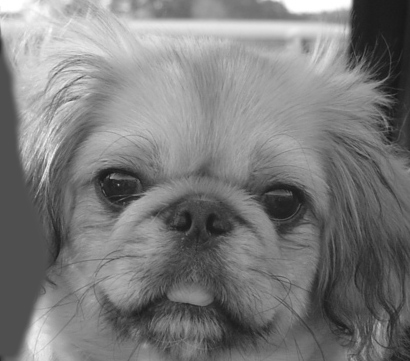

Filtered: 



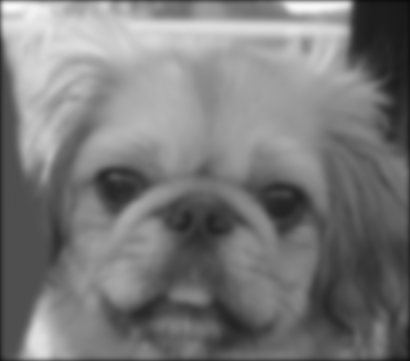

In [11]:
print("Original: \n")
display(img)
print("Filtered: \n")
display(filtered_img)


2-5 (a)

In [12]:
def gaussconvolve2d_scipy(array,sigma):
  """Applies Gaussian convolution to a 2D array for the given value of sigma.

  Returns:
    2D array

  """

  filter = gauss2d(sigma)
  return signal.convolve2d(array,filter,'same')

signal.convolve2d and signal.correlate2d produces the same result in this example since the Gaussian filter we are using is symmetric. This is not the case if the filter is asymmetric.

2-5 (b)

In [13]:
# Convolve and convert to uint8 (0 to 255) and then to a PIL image
scipy_arr = gaussconvolve2d_scipy(img_array, 3)
scipy_img = PIL.Image.fromarray(scipy_arr.astype('uint8'))

2-5 (c)

Original: 



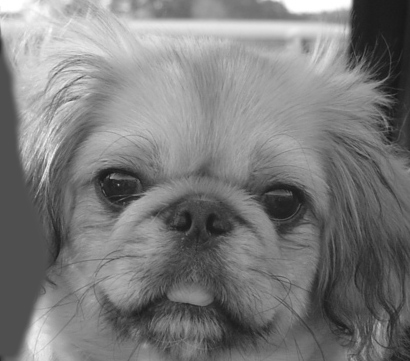

Filtered: 



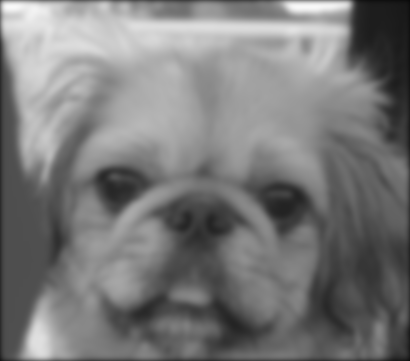

In [14]:
print("Original: \n")
display(img)
print("Filtered: \n")
display(scipy_img)

2-6

In [15]:
import time

# img_array is based on the greyscale dog image

t1 = time.time() # start timestamp
gaussconvolve2d_manual(img_array, 10) # some operations to time
duration_manual = time.time() - t1 # duration in seconds
print(f"duration_manual: {duration_manual} s")

t2 = time.time()
gaussconvolve2d_scipy(img_array, 10)
duration_scipy = time.time() - t2
print(f"duration_scipy: {duration_scipy} s")


duration_manual: 1.8500678539276123 s
duration_scipy: 1.4870774745941162 s


gaussconvolve2d_scipy has a better performance than gaussconvolve2d_manual with sigma = 10. The former uses highly optimized algorithms under the hood, such as Fourier transforms or direct methods that are implemented in low-level languages, so it makes sense that it computes faster than the latter.

2-7

We can take advantage of separability of 2D Gaussian and perform convolution on two 1D filters. This is much faster than the convolving on 2D filters since two 1D filters will result in having a 2*n multiplications whereas 2D filters having a n^2 multiplications, where the filter is defined by n x n dimensions.

Part 3: Hybrid Images

3-1

Original image: 



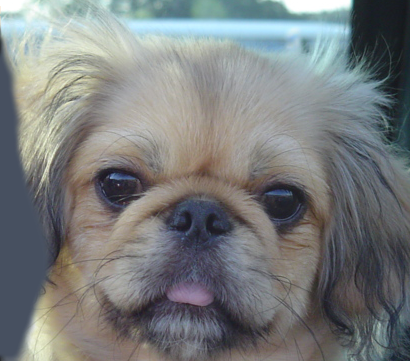

Low pass image with sigma = 5: 



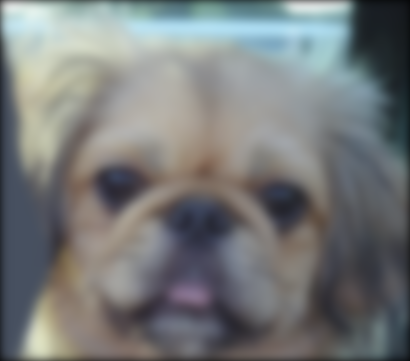

In [16]:
def lowpass_filter(img_array, sigma):
  """Applies gaussconvolve2d_manual to a 3D array for the given value of sigma.

  Args:
    img_array: RGB color channel array

  Returns:
    3D array

  """
  # Extract RGB channels from the image array
  r_img_array = img_array[:,:,0]
  g_img_array = img_array[:,:,1]
  b_img_array = img_array[:,:,2]

  # Filter each color channel and compose them back to the color image
  img_array[:,:,0] = gaussconvolve2d_manual(r_img_array, sigma)
  img_array[:,:,1] = gaussconvolve2d_manual(g_img_array, sigma)
  img_array[:,:,2] = gaussconvolve2d_manual(b_img_array, sigma)

  return img_array


SIGMA = 5

# Load image and convert it to array
img = PIL.Image.open('0b_dog.bmp')
img_array = np.asfarray(img)

lowpass_arr = lowpass_filter(img_array, SIGMA)
lowpass_img = PIL.Image.fromarray(lowpass_arr.astype('uint8'))

# Display images
print("Original image: \n")
display(img)
print(f"Low pass image with sigma = {SIGMA}: \n")
display(lowpass_img)

3-2

Original image: 



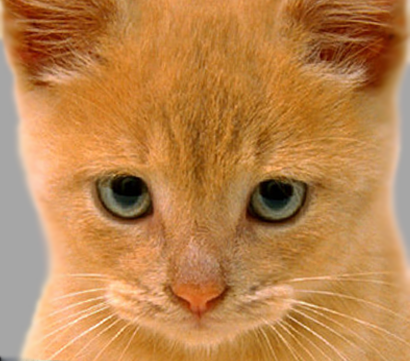

High pass image with sigma = 5: 



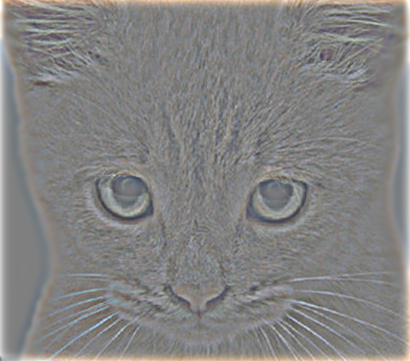

In [17]:
# Load image and convert it to array
img = PIL.Image.open('0a_cat.bmp')
img_array = np.asfarray(img)

# High pass filter
lowpass_arr = lowpass_filter(img_array, SIGMA) # SIGMA from 3-1
highpass_arr = np.asfarray(img) - lowpass_arr
corrected_highpass_arr = np.clip(highpass_arr + 128, 0, 255)

# Convert the array to image
corrected_highpass_img = PIL.Image.fromarray(corrected_highpass_arr.astype('uint8'))

# Display images
print("Original image: \n")
display(img)
print(f"High pass image with sigma = {SIGMA}: \n")
display(corrected_highpass_img)

3-3

sigma = 3


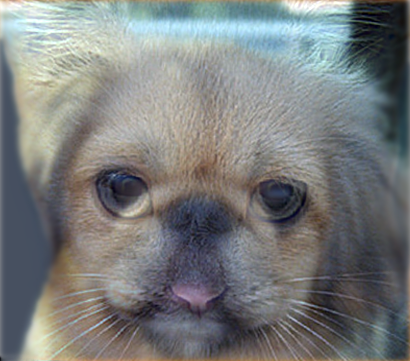



sigma = 7


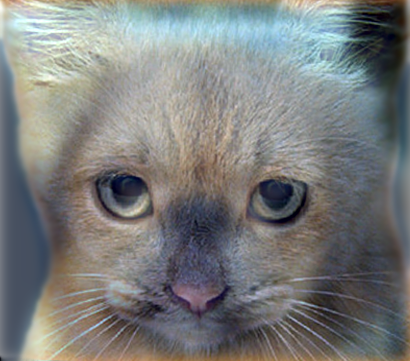



sigma = 11


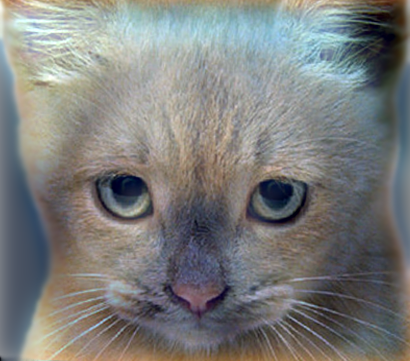



sigma = 3


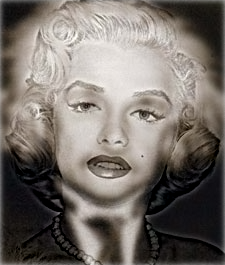



sigma = 7


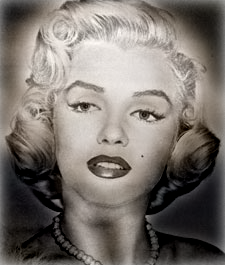



sigma = 11


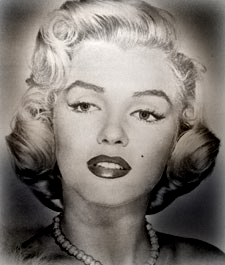



sigma = 3


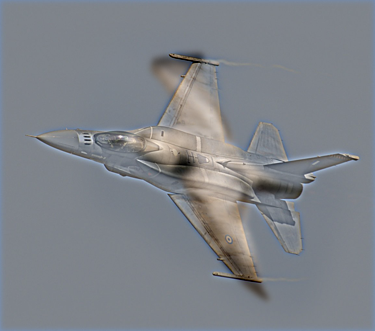

sigma = 7


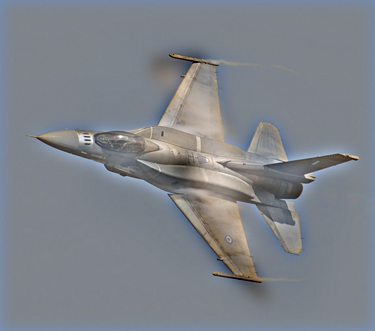

sigma = 11


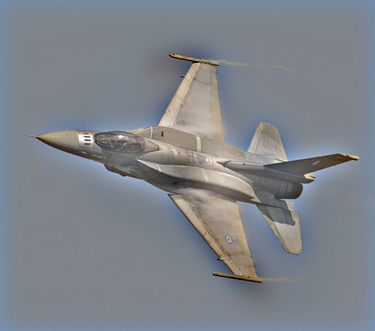

In [18]:
def hybrid_filter(img1_path, img2_path, sigma):
  """Returns a hybrid image that is generated by merging low-pass and
     high-pass filtered image with the given sigma value.

  Args:
    img1_path (str): an image which is used for low pass
    img2_path (str): an image which is used for high pass
    sigma (int): a parameter used in gaussian

  Returns:
    PIL.Image

  """
  # Load images and convert them to array
  img1 = PIL.Image.open(img1_path)
  img1_array = np.asfarray(img1)

  img2 = PIL.Image.open(img2_path)
  img2_array = np.asfarray(img2)

  # High pass filter
  lowpass_arr = lowpass_filter(img2_array, sigma)
  highpass_arr = np.asfarray(img2) - lowpass_arr

  # Hybrid filter
  hybrid_array = lowpass_filter(img1_array,sigma) + highpass_arr

  # Extract RGB channels and clip each values
  r_img_array = hybrid_array[:,:,0]
  g_img_array = hybrid_array[:,:,1]
  b_img_array = hybrid_array[:,:,2]

  hybrid_array[:,:,0]  = np.clip(r_img_array, 0, 255)
  hybrid_array[:,:,1] = np.clip(g_img_array, 0, 255)
  hybrid_array[:,:,2] = np.clip(b_img_array, 0, 255)

  # Covert the array back to an image
  hybrid_img = PIL.Image.fromarray(hybrid_array.astype('uint8'))

  return hybrid_img


sigmas = [3, 7, 11]
for sigma in sigmas:
  print(f"sigma = {sigma}")
  display(hybrid_filter("0b_dog.bmp","0a_cat.bmp", sigma))
  print("\n")
for sigma in sigmas:
  print(f"sigma = {sigma}")
  display(hybrid_filter("2a_einstein.bmp","2b_marilyn.bmp", sigma))
  print("\n")
for sigma in sigmas:
  print(f"sigma = {sigma}")
  display(hybrid_filter("4a_bird.bmp","4b_plane.bmp", sigma))


Part 4: Playing with Different Denoising Filters

4-1

1) Applying GaussianBlur to box_gauss.png... 



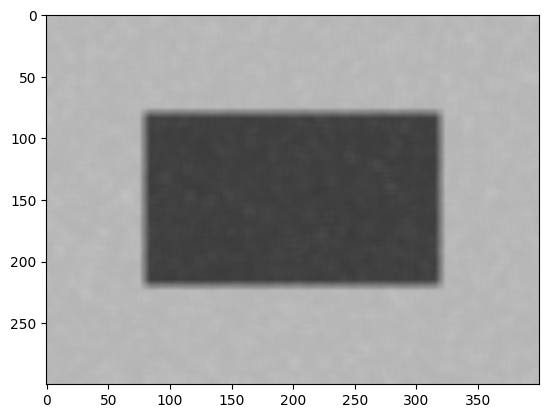



2) Applying bilateralFilter to box_gauss.png... 



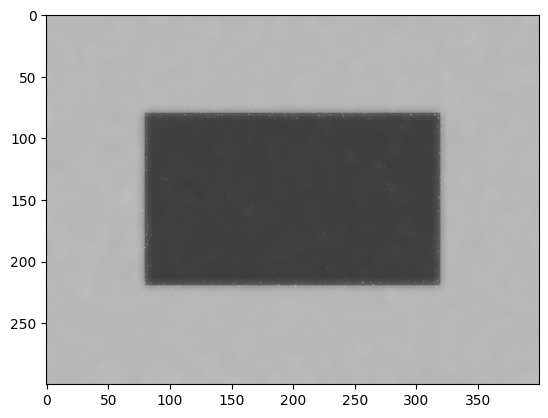



3) Applying medianBlur to box_gauss.png... 



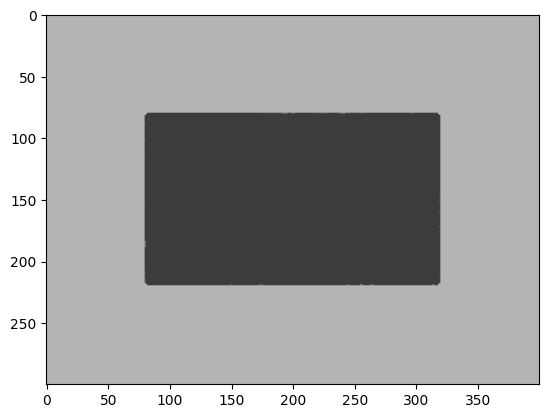



1) Applying GaussianBlur to box_speckle.png... 



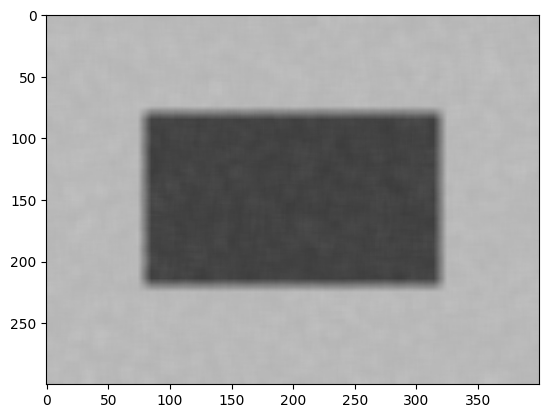



2) Applying bilateralFilter to box_speckle.png... 



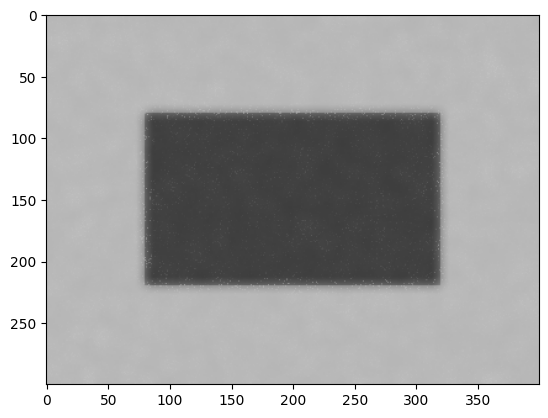



3) Applying medianBlur to box_speckle.png... 



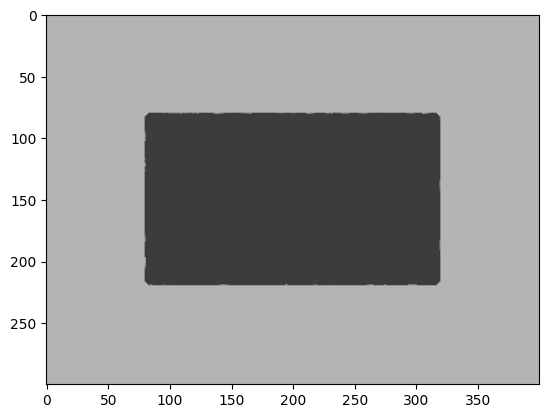

In [19]:
# box_gauss
box_gauss = cv2.imread("box_gauss.png")
print(f"1) Applying GaussianBlur to box_gauss.png... \n")
plt.imshow(cv2.GaussianBlur(box_gauss, ksize=(9, 9), sigmaX=15))
plt.show()
print("\n")
print(f"2) Applying bilateralFilter to box_gauss.png... \n")
plt.imshow(cv2.bilateralFilter(box_gauss, 15, sigmaColor=270, sigmaSpace=270))
plt.show()
print("\n")
print(f"3) Applying medianBlur to box_gauss.png... \n")
plt.imshow(cv2.medianBlur(box_gauss,5))
plt.show()

print("\n")

# box_speckle
box_speckle = cv2.imread("box_speckle.png")
print(f"1) Applying GaussianBlur to box_speckle.png... \n")
plt.imshow(cv2.GaussianBlur(box_speckle, ksize=(11, 11), sigmaX=15))
plt.show()
print("\n")
print(f"2) Applying bilateralFilter to box_speckle.png... \n")
plt.imshow(cv2.bilateralFilter(box_speckle, 17, sigmaColor=300, sigmaSpace=300))
plt.show()
print("\n")
print(f"3) Applying medianBlur to box_speckle.png... \n")
plt.imshow(cv2.medianBlur(box_speckle,7))
plt.show()

4-2

1) Applying GaussianBlur to box_gauss.png... 



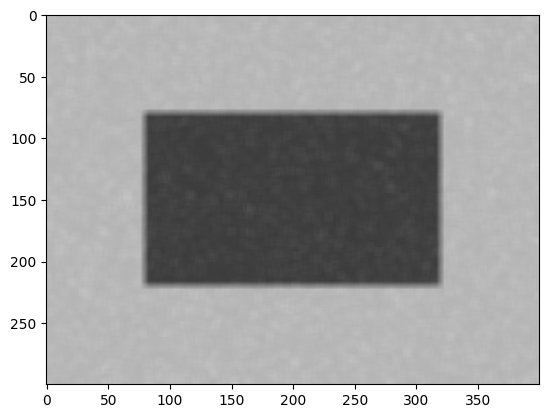



2) Applying bilateralFilter to box_gauss.png... 



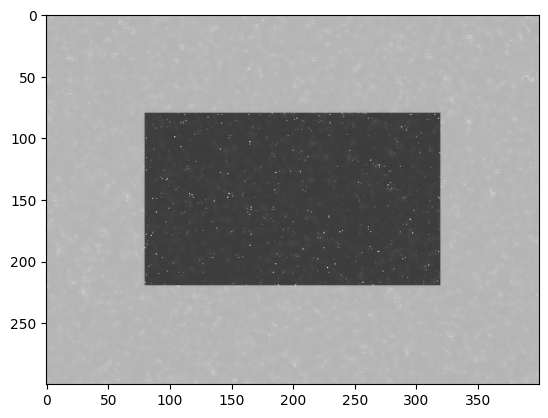



3) Applying medianBlur to box_gauss.png... 



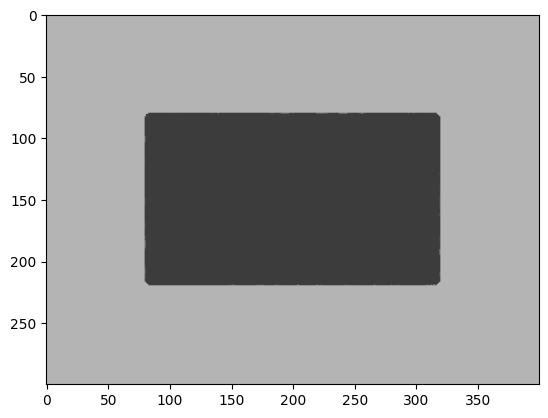



1) Applying GaussianBlur to box_speckle.png... 



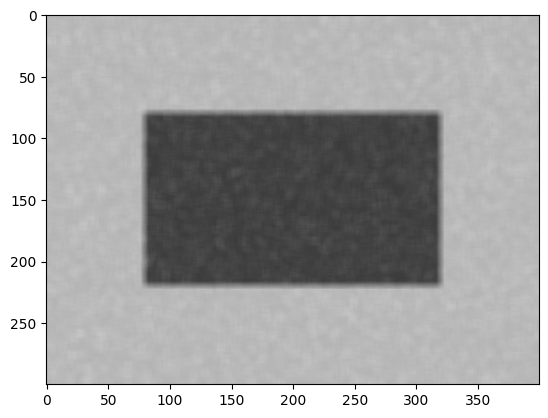



2) Applying bilateralFilter to box_speckle.png... 



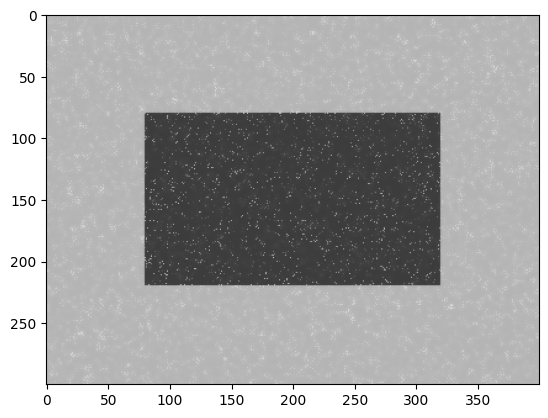



3) Applying medianBlur to box_speckle.png... 



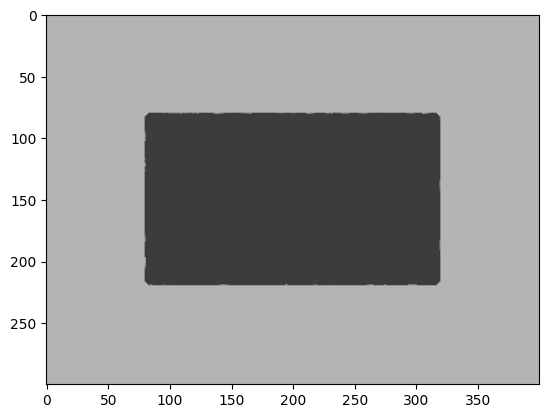

In [20]:
# box_gauss
print(f"1) Applying GaussianBlur to box_gauss.png... \n")
plt.imshow(cv2.GaussianBlur(box_gauss, ksize=(7, 7), sigmaX=50))
plt.show()
print("\n")
print(f"2) Applying bilateralFilter to box_gauss.png... \n")
plt.imshow(cv2.bilateralFilter(box_gauss, 7, sigmaColor=150, sigmaSpace=150))
plt.show()
print("\n")
print(f"3) Applying medianBlur to box_gauss.png... \n")
plt.imshow(cv2.medianBlur(box_gauss,7))
plt.show()

print("\n")

# box_speckle
print(f"1) Applying GaussianBlur to box_speckle.png... \n")
plt.imshow(cv2.GaussianBlur(box_speckle, ksize=(7, 7), sigmaX=50))
plt.show()
print("\n")
print(f"2) Applying bilateralFilter to box_speckle.png... \n")
plt.imshow(cv2.bilateralFilter(box_speckle, 7, sigmaColor=150, sigmaSpace=150))
plt.show()
print("\n")
print(f"3) Applying medianBlur to box_speckle.png... \n")
plt.imshow(cv2.medianBlur(box_speckle,7))
plt.show()

1. Gaussian filter
We can easily denoise the image with some tweaks in the parameters but it can get really blurry which results in losing visual information.

2. Bilateral filter
It requires some more tweaks in the parameters than Gaussian filter, but even with pretty good denoising, the image doesn't get as blurry as Gaussian.

3. Median filter
We can get rid of almost all of the noise on the image, but it tends to break the image edges and produce false noise on the edges.